<a href="https://colab.research.google.com/github/Eshapriyadarshi/Cancer_detection/blob/master/Histopathologic_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 977kB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=c240c7d5c6372fabe8f0bd817768bf16d05517af6a5b929fef17e136f3392be7
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"eshapriyadarshi","key":"106bed7af571d02b24c3c4ac0a1e467f"}'}

In [ ]:
 #Make directory named kaggle and copy kaggle.json file there
 ! mkdir -p ~/.kaggle
 ! cp kaggle.json ~/.kaggle/

In [ ]:
#Change the permissions of the file.
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
 ! kaggle datasets list

ref                                                               title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/covid19-tweets                                             COVID19 Tweets                                    20MB  2020-08-13 11:12:23           1695        139  1.0              
christianlillelund/passenger-list-for-the-estonia-ferry-disaster  The Estonia Disaster Passenger List               14KB  2020-07-26 15:40:17            486         65  0.8235294        
futurecorporation/epitope-prediction                              COVID-19/SARS B-cell Epitope Prediction            1MB  2020-07-24 02:53:28            404         57  1.0              
Cornell-University/arxiv                                         

In [ ]:
! kaggle competitions download -c histopathologic-cancer-detection

100% 6.31G/6.31G [02:43<00:00, 64.3MB/s]
100% 6.31G/6.31G [02:43<00:00, 41.4MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/fa2c657eff58b6802cb32843caa2fac25b67c2c9.tif  
  inflating: train/fa2c775c4457d0aeb7e57216849eef5f4e72e566.tif  
  inflating: train/fa2c77e1707c2fe7b0016e00736fb6e4b7f09488.tif  
  inflating: train/fa2ce5e802dd281bd98fcfb538e80b9c96c2b7af.tif  
  inflating: train/fa2d24e4a109d2d3a925890aaed4e0f038dfffb0.tif  
  inflating: train/fa2d7e4865aa7869d2dd85116323b8405c94f1c2.tif  
  inflating: train/fa2d8b2e4acf46e278e2e7acbc034c263d970737.tif  
  inflating: train/fa2df9148831509a181797db79eb1a7bf39593f1.tif  
  inflating: train/fa2e6db0b35484797f58005e3a6e24ca75fbca76.tif  
  inflating: train/fa2e80e84594465329bdc0c8d1b3a507275fbb4d.tif  
  inflating: train/fa2eaf8ec6267fa928a88775dc15ee25b633c537.tif  
  inflating: train/fa2ebf31ff5954570526d4835ac5368fabc1f035.tif  
  inflating: train/fa2efd2dda5235a3e397ea0dd637ea13a78f7599.tif  
  inflating: train/fa2f1d5e86165f63c57acdf9d23521f2b8070e0c.tif  
  inflating: train/fa2ffa

In [ ]:
!pip install scikit-plot
import numpy as np
import pandas as pd
import os
import cv2
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_roc_curve, plot_confusion_matrix

import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop, Adam

print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2.3.0


In [ ]:
os.listdir('../content')

['.config',
 'sample_submission.csv',
 'test',
 'kaggle.json',
 'train_labels.csv',
 'train',
 'sample_data']

In [ ]:
print('total training images:', len(os.listdir('../content/train')))
print('total testing images:', len(os.listdir('../content/test')))

total training images: 220025
total testing images: 57458


In [ ]:
df = pd.read_csv('../content/train_labels.csv')
print('Shape of DataFrame: ', df.shape)
df.head()


Shape of DataFrame:  (220025, 2)


,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [ ]:
df.describe()

,label
count,220025.000000
mean,0.405031
std,0.490899
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
IMAGE_PATH = '../content/train/'

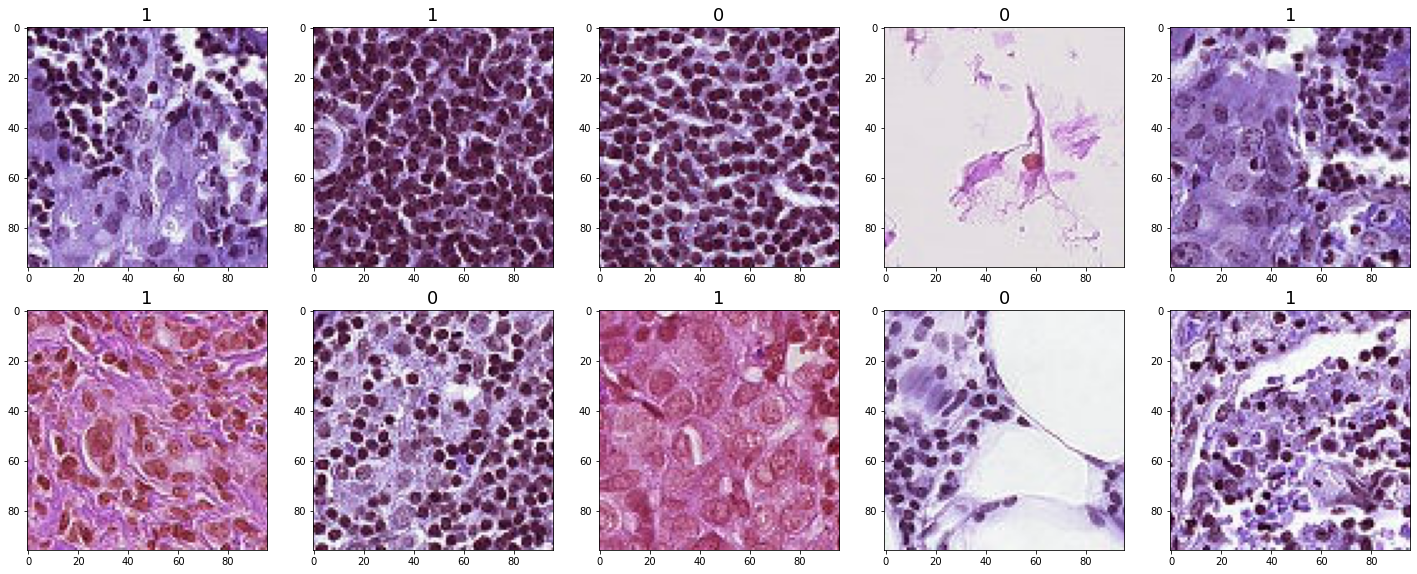

In [ ]:
fig, axes = plt.subplots(2,5, figsize=(20,8))
index=1
for i in np.random.randint(low = 0, high = df.shape[0], size = 10):
  file = IMAGE_PATH + df.iloc[i]['id'] + '.tif'
  img = cv2.imread(file)
  plt.subplot(2,5,index)
  plt.imshow(img, cmap = 'gray')
  plt.gca().set_title(df.iloc[i]['label'],fontsize = 18)
  index += 1
plt.tight_layout()
plt.show()

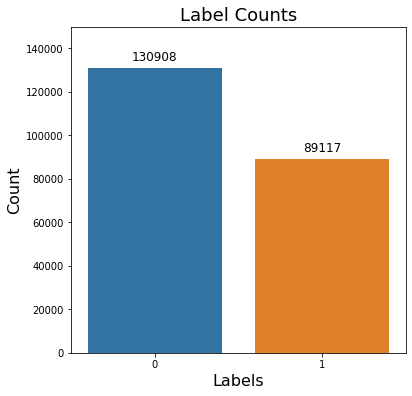

In [ ]:
fig = plt.figure(figsize = (6,6)) 
ax = sns.countplot(df.label).set_title('Label Counts', fontsize = 18)
plt.annotate(df.label.value_counts()[0],
            xy = (0,df.label.value_counts()[0] + 2000),
            va = 'bottom',
            ha = 'center',
            fontsize = 12)
plt.annotate(df.label.value_counts()[1],
            xy = (1,df.label.value_counts()[1] + 2000),
            va = 'bottom',
            ha = 'center',
            fontsize = 12)
plt.ylim(0,150000)
plt.ylabel('Count', fontsize = 16)
plt.xlabel('Labels', fontsize = 16)
plt.show()

In [ ]:
SAMPLE_SIZE = 89000
df_0 = df[df['label'] == 0].sample(SAMPLE_SIZE, random_state = 101)
df_1 = df[df['label'] == 1].sample(SAMPLE_SIZE, random_state = 101)

df_train = pd.concat([df_0, df_1]).reset_index(drop = True)
df_train = df_train.sample(frac =1)
df_train['label'].value_counts()

1    89000
0    89000
Name: label, dtype: int64

In [ ]:
y = df_train['label']

df_train, df_val = train_test_split(df_train, test_size = 0.10, random_state = 0, stratify = y)
print('No.of tranining items: ', df_train.shape[0])
print('No.of validation items: ', df_val.shape[0])

No.of tranining items:  160200
No.of validation items:  17800


In [ ]:
df_train['label'].value_counts()

1    80100
0    80100
Name: label, dtype: int64

In [ ]:
df_val['label'].value_counts()

1    8900
0    8900
Name: label, dtype: int64

In [ ]:
# Create a new directory
base_dir = 'new_directory'
os.mkdir(base_dir)

#Folder Structure

'''
    * base_dir
        |-- train_dir
            |-- 0   #No Tumor
            |-- 1   #Has Tumor
        |-- val_dir
            |-- 0
            |-- 1
'''
# create a path to 'base_dir' to which we will join the names of the new folders
# train_dir
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

#val_dir
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)

# create new folders inside train_dir, for each class
no_tumor = os.path.join(train_dir, '0')
os.mkdir(no_tumor)
has_tumor = os.path.join(train_dir, '1')
os.mkdir(has_tumor)

# create new folders inside val_dir, for each class
no_tumor = os.path.join(val_dir, '0')
os.mkdir(no_tumor)
has_tumor = os.path.join(val_dir, '1')
os.mkdir(has_tumor)

In [ ]:
print(os.listdir('new_directory/train_dir/'))
print(os.listdir('new_directory/val_dir/'))

['1', '0']
['1', '0']


In [ ]:
df.set_index('id', inplace=True)
train_list = list(df_train['id'])
val_list = list(df_val['id'])

for image in train_list:
  file_name = image + '.tif'
  target_folder = df.loc[image,'label']

  if target_folder == 0:
    label = '0'
  elif target_folder == 1:
    label = '1'

  src = os.path.join('../content/train/', file_name)
  dst = os.path.join(train_dir, label, file_name)

  shutil.copyfile(src, dst)


for image in val_list:
  file_name = image + '.tif'
  target_folder = df.loc[image,'label']

  if target_folder == 0:
    label = '0'
  elif target_folder == 1:
    label = '1'

  src = os.path.join('../content/train/', file_name)
  dst = os.path.join(val_dir, label, file_name)

  shutil.copyfile(src, dst)


In [ ]:
print('Images in train dir, no tumor: ', len(os.listdir('new_directory/train_dir/0')))
print('Images in train dir, tumor: ', len(os.listdir('new_directory/train_dir/1')))

print('Images in val dir, no tumor: ', len(os.listdir('new_directory/val_dir/0')))
print('Images in val dir, tumor: ', len(os.listdir('new_directory/val_dir/1')))

Images in train dir, no tumor:  80100
Images in train dir, tumor:  80100
Images in val dir, no tumor:  8900
Images in val dir, tumor:  8900


In [ ]:
train_path = 'new_directory/train_dir'
val_path = 'new_directory/val_dir'
test_path = '../content/test'

In [71]:
# All images will be rescaled by 1./255
datagen = ImageDataGenerator(rescale=1./255)
IMAGE_SIZE = 96
Train_batch_size = 40
Val_batch_size = 40
num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_steps = np.round(num_train_samples / Train_batch_size)
val_steps = np.round(num_val_samples / Val_batch_size)

train_gen = datagen.flow_from_directory(train_path, 
                                        target_size= (IMAGE_SIZE,IMAGE_SIZE), 
                                        batch_size= Train_batch_size,
                                        class_mode='categorical')

val_gen = datagen.flow_from_directory(val_path, 
                                      target_size= (IMAGE_SIZE,IMAGE_SIZE), 
                                      batch_size= Val_batch_size,
                                      class_mode='categorical')

# Note: shuffle=False causes the test dataset to not be shuffled
test_gen = datagen.flow_from_directory(val_path,
                                       target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                       batch_size=1,
                                       class_mode='binary',
                                       shuffle=False)

Found 160200 images belonging to 2 classes.
Found 17800 images belonging to 2 classes.
Found 17800 images belonging to 2 classes.


In [ ]:
print(train_steps)
print(val_steps)

4005.0
445.0


In [ ]:
INPUT_SHAPE = (96,96,3)
model = keras.models.Sequential()
model.add(keras.layers.SeparableConv2D(32, (3, 3), padding="same",input_shape = INPUT_SHAPE))
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.BatchNormalization(axis=-1))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

# (CONV => RELU => POOL) * 2
model.add(keras.layers.SeparableConv2D(64, (3, 3), padding="same"))
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.BatchNormalization(axis=-1))
model.add(keras.layers.SeparableConv2D(64, (3, 3), padding="same"))
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.BatchNormalization(axis=-1))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

# (CONV => RELU => POOL) * 3
model.add(keras.layers.SeparableConv2D(128, (3, 3), padding="same"))
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.BatchNormalization(axis=-1))
model.add(keras.layers.SeparableConv2D(128, (3, 3), padding="same"))
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.BatchNormalization(axis=-1))
model.add(keras.layers.SeparableConv2D(128, (3, 3), padding="same"))
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.BatchNormalization(axis=-1))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
        
# first (and only) set of FC => RELU layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256))
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

# sigmoid classifier
model.add(keras.layers.Dense(1))
model.add(keras.layers.Activation("sigmoid"))
        


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d (SeparableC (None, 96, 96, 32)        155       
_________________________________________________________________
activation (Activation)      (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 48, 48, 64)        2400      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 64)        0

In [ ]:
model.compile(Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:

filepath = "checkpoint.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose = 1, 
                                             save_best_only = True, mode = 'max')
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor = 0.5, patience = 3,
                                              verbose = 1, mode = 'max', min_lr = 0.00001)                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit(train_gen, steps_per_epoch = train_steps, 
                    validation_data = val_gen,
                    validation_steps = val_steps,
                    epochs = 6,
                    verbose = 1,
                    callbacks = callbacks_list)

Epoch 1/6
4005/4005 [==============================] - ETA: 0s - loss: 0.4289 - accuracy: 0.8082
Epoch 00001: val_accuracy improved from -inf to 0.79876, saving model to checkpoint.h5
4005/4005 [==============================] - 5370s 1s/step - loss: 0.4289 - accuracy: 0.8082 - val_loss: 0.5612 - val_accuracy: 0.7988
Epoch 2/6
4005/4005 [==============================] - ETA: 0s - loss: 0.3547 - accuracy: 0.8475
Epoch 00002: val_accuracy improved from 0.79876 to 0.85084, saving model to checkpoint.h5
4005/4005 [==============================] - 5327s 1s/step - loss: 0.3547 - accuracy: 0.8475 - val_loss: 0.4015 - val_accuracy: 0.8508
Epoch 3/6
4005/4005 [==============================] - ETA: 0s - loss: 0.3201 - accuracy: 0.8641
Epoch 00003: val_accuracy did not improve from 0.85084
4005/4005 [==============================] - 5453s 1s/step - loss: 0.3201 - accuracy: 0.8641 - val_loss: 0.4144 - val_accuracy: 0.8493
Epoch 4/6
4005/4005 [==============================] - ETA: 0s - loss: 0

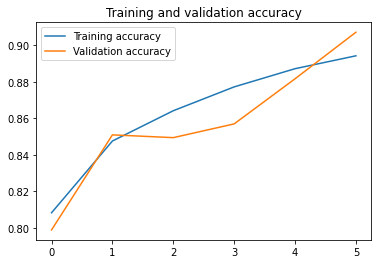

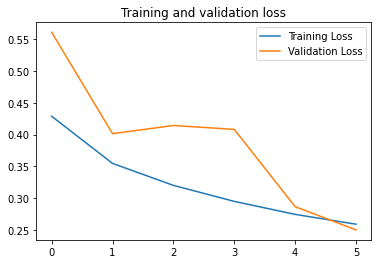

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
# Here the best epoch will be used.
model.load_weights('checkpoint.h5')

val_loss, val_acc = model.evaluate(test_gen, steps=len(df_val))
print('val_loss:', val_loss)
print('val_acc:', val_acc)

17800/17800 [==============================] - 258s 14ms/step - loss: 0.2500 - accuracy: 0.9071
val_loss: 0.24995391070842743
val_acc: 0.9070786237716675


In [51]:
# make a prediction
predictions = model.predict_generator(test_gen, steps=len(df_val), verbose=1)

17800/17800 [==============================] - 270s 15ms/step


In [57]:
no_tumor = []
for i in predictions:
  no_tumor.append(1-i) 

In [59]:
T = np.array(has_tumor)
T.shape

(17800, 1)

In [66]:
new_pred = np.append(T, predictions, axis=1)
new_pred.shape

(17800, 2)

In [67]:
# Put the predictions into a dataframe.
df_preds = pd.DataFrame(new_pred, columns=['no_tumor', 'has_tumor'])
df_preds.head()

,no_tumor,has_tumor
0,0.984900,0.015100
1,0.892763,0.107237
2,0.076466,0.923534
3,0.985258,0.014742
4,0.947464,0.052536


In [72]:
# Get the true labels
y_true = test_gen.classes

# Get the predicted labels as probabilities
y_pred = df_preds['has_tumor']

print('ROC AUC Score = ',roc_auc_score(y_true, y_pred))

ROC AUC Score =  0.964241661406388


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


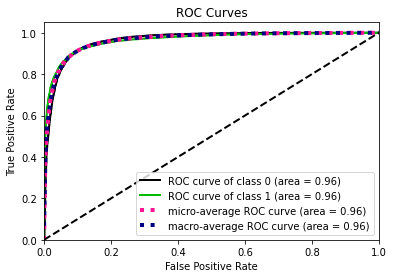

In [96]:
#ROC Curve
plot_roc_curve(y_true,df_preds ) 
plt.show()

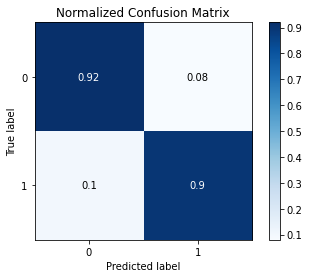

In [105]:
#Confusion matrix

# For this to work we need y_pred as binary labels not as probabilities
y_pred_binary = new_pred.argmax(axis=1)
plot_confusion_matrix(y_true, y_pred_binary, normalize=True)
plt.show()


In [98]:
report = classification_report(y_true, y_pred_binary, target_names = ['no_tumor', 'has_tumor'])
print(report)

              precision    recall  f1-score   support

    no_tumor       0.50      1.00      0.67      8900
   has_tumor       0.00      0.00      0.00      8900

    accuracy                           0.50     17800
   macro avg       0.25      0.50      0.33     17800
weighted avg       0.25      0.50      0.33     17800



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
